In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
accidents_data = pd.read_csv(
    '/Users/ilya/Desktop/GitHub_Repositories/HW_University/Data_Visualization/Course_Work/US_Accidents_2020-2023.csv')

In [4]:
# Convert Start_Time to datetime
# Adjusted code for datetime conversion
accidents_data['Start_Time'] = pd.to_datetime(
    accidents_data['Start_Time'], dayfirst=True)

In [5]:
# Create a dictionary mapping state abbreviations to their full names
state_abbr_to_full = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

# Convert the state abbreviations in your DataFrame to full names using the mapping
accidents_data['State_Full'] = accidents_data['State'].map(state_abbr_to_full)

In [7]:
# Extract year, month, and day
accidents_data['Year'] = accidents_data['Start_Time'].dt.year
accidents_data['Month'] = accidents_data['Start_Time'].dt.month
accidents_data['Day'] = accidents_data['Start_Time'].dt.day
accidents_data['Hour'] = accidents_data['Start_Time'].dt.hour

In [8]:
# Exclude accidents from 2023
accidents_data = accidents_data[accidents_data['Year'] != 2023]

In [14]:
# Define time of day based on hour
bins = [0, 6, 10, 16, 20, 24]
labels = ['Night (20-6 hrs)', 'Morning (6-10 hrs)',
          'Daytime (10-16 hrs)', 'Evening (16-20 hrs)', 'Night (20-6 hrs)']
accidents_data['Time_of_Day'] = pd.cut(
    accidents_data['Hour'], bins=bins, labels=labels, right=False, ordered=False)

In [9]:
# Accidents by year, month, day
accidents_by_ymd = accidents_data.groupby(
    ['Year', 'Month', 'Day']).size().reset_index(name='Accidents')

In [10]:
# Accidents by time of day
accidents_by_time = accidents_data.groupby(
    ['Time_of_Day']).size().reset_index(name='Accidents')

KeyError: 'Time_of_Day'

In [11]:
# Adjusting the code to generate three separate visualizations for accidents by year, month, and day.

# Summarizing accidents by Year
accidents_by_year = accidents_data.groupby(
    'Year').size().reset_index(name='Total Accidents')

# Summarizing accidents by Month (regardless of the year)
accidents_by_month = accidents_data.groupby(
    'Month').size().reset_index(name='Total Accidents')

# Summarizing accidents by Day of the month (regardless of the month and year)
accidents_by_day = accidents_data.groupby(
    'Day').size().reset_index(name='Total Accidents')

# Generating Plotly Visualizations

# Accidents by Year
fig_year = px.bar(accidents_by_year, x='Year',
                  y='Total Accidents', title='Total Accidents by Year')

# Accidents by Month
fig_month = px.bar(accidents_by_month, x='Month',
                   y='Total Accidents', title='Total Accidents by Month')

# Accidents by Day
fig_day = px.bar(accidents_by_day, x='Day', y='Total Accidents',
                 title='Total Accidents by Day of the Month')

fig_year.show(), fig_month.show(), fig_day.show()

(None, None, None)

In [23]:
# Accidents by Time of Day (Sample Visualization)
fig_time = px.bar(accidents_by_time, x='Time_of_Day',
                  y='Accidents', title='Accidents by Time of Day')
fig_time.show()

## States and cities graphs

In [48]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Heatmap of US states based on no. of accidents
accidents_by_state = accidents_data.groupby(
    ['State_Full', 'State']).size().reset_index(name='Accidents')


# Assuming accidents_by_state now has 'State_Full' with full state names after mapping
# Prepare text for hover information with full state names and accident counts
accidents_by_state['text'] = accidents_by_state['State_Full'] + \
    '<br>Accidents: ' + accidents_by_state['Accidents'].astype(str)

# Create the choropleth map
fig = go.Figure(data=go.Choropleth(
    # Use the abbreviation for spatial coordinates
    locations=accidents_by_state['State'],
    z=accidents_by_state['Accidents'].astype(float),  # Data to be color-coded
    locationmode='USA-states',  # Set to plot as US States
    text=accidents_by_state['text'],  # Text to display on hover
    colorscale='Viridis',
    colorbar_title="Accidents",
))

fig.update_layout(
    title_text='Heatmap of US States Based on Number of Accidents',
    geo_scope='usa',  # Limit map scope to USA
)

# Prepare data for the top 10 states table, using full state names
top_states = accidents_by_state.nlargest(10, 'Accidents')

# Create a table figure
table = go.Figure(data=[go.Table(
    header=dict(values=['State', 'Accidents']),
    cells=dict(values=[top_states.State_Full, top_states.Accidents]))
])

# Combine the choropleth map and the table
fig_combined = make_subplots(rows=1, cols=2, specs=[
                             [{"type": "choropleth"}, {"type": "table"}]])
fig_combined.add_trace(fig.data[0], row=1, col=1)
fig_combined.add_trace(table.data[0], row=1, col=2)

# Adjust layout as needed
fig_combined.update_layout(
    title_text='Heatmap and Top 10 States by Number of Accidents',
    geo_scope='usa',  # Limit map scope to USA
)

fig_combined.show()

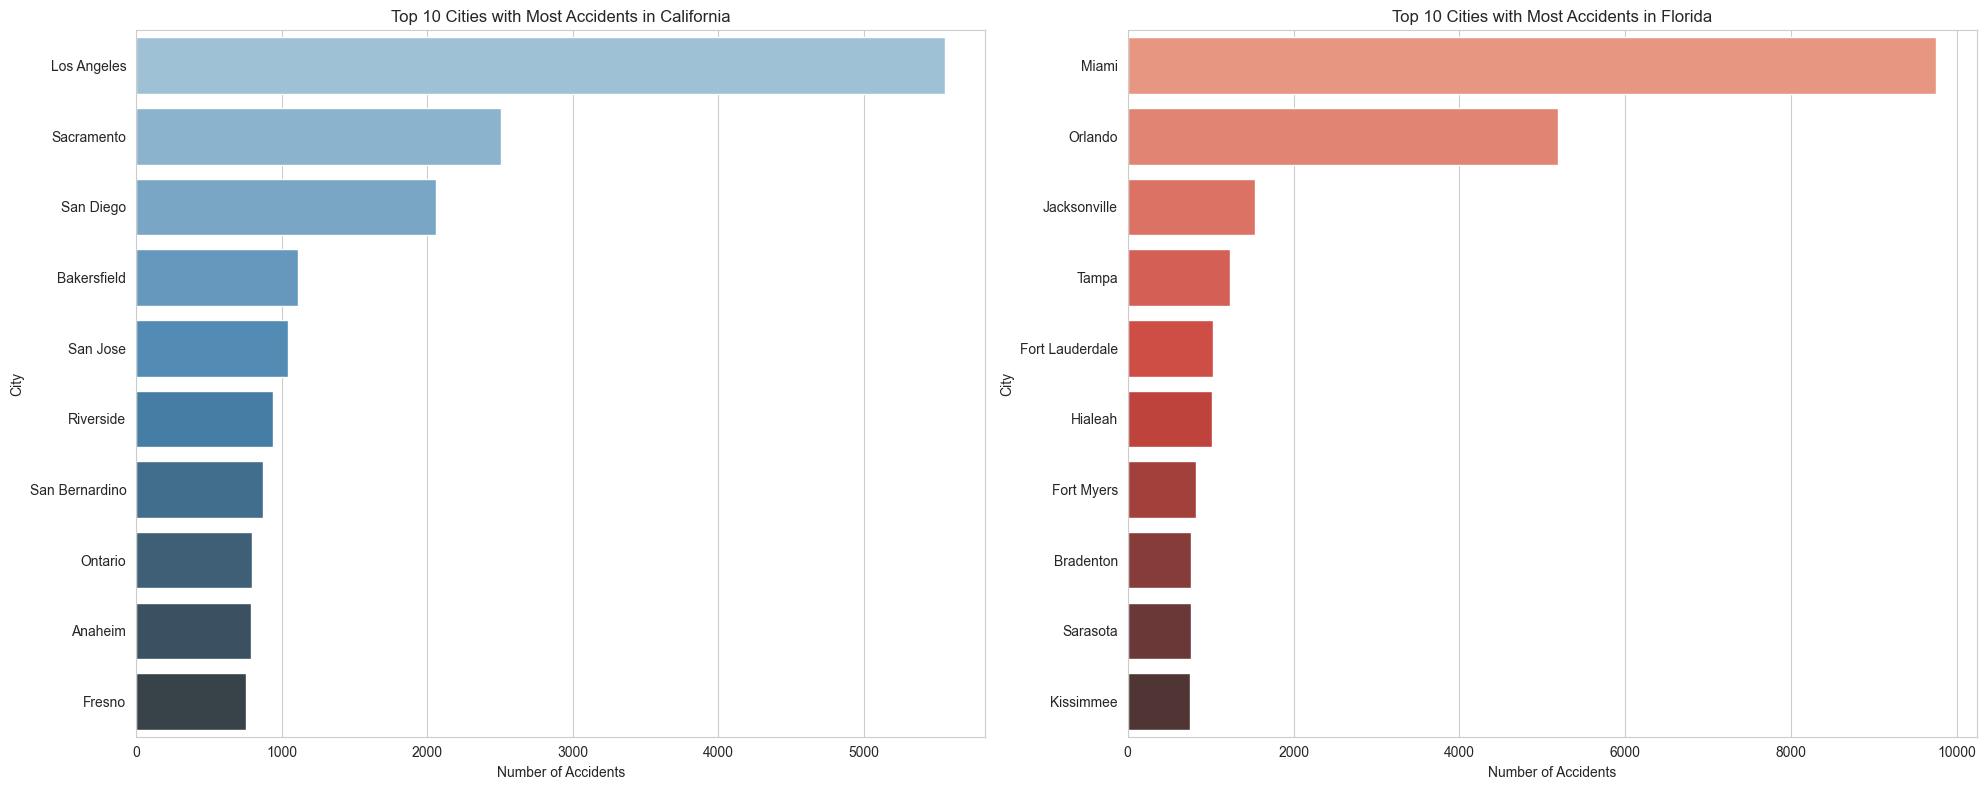

In [ ]:
# Let's filter the data for California and Florida, and then create visualizations for accidents in cities within these states.

# Filter the dataset for California and Florida
import seaborn as sns
import matplotlib.pyplot as plt
california_accidents = accidents_data[accidents_data['State'] == 'CA']
florida_accidents = accidents_data[accidents_data['State'] == 'FL']

# We'll create two bar plots to visualize the top cities in California and Florida with the most accidents.

# Importing necessary libraries for visualization

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Getting the top 10 cities with the most accidents in California
top_cities_ca = california_accidents['City'].value_counts().head(10)

# Getting the top 10 cities with the most accidents in Florida
top_cities_fl = florida_accidents['City'].value_counts().head(10)

# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Top cities in California
sns.barplot(x=top_cities_ca.values, y=top_cities_ca.index,
            ax=ax[0], palette="Blues_d")
ax[0].set_title('Top 10 Cities with Most Accidents in California')
ax[0].set_xlabel('Number of Accidents')
ax[0].set_ylabel('City')

# Top cities in Florida
sns.barplot(x=top_cities_fl.values, y=top_cities_fl.index,
            ax=ax[1], palette="Reds_d")
ax[1].set_title('Top 10 Cities with Most Accidents in Florida')
ax[1].set_xlabel('Number of Accidents')
ax[1].set_ylabel('City')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [61]:
# Since we are interested in plotting geographical data for cities in California and Florida,
# we will create scatter plots on maps using latitude and longitude for precise locations.

# Filter the data for California and Florida
import plotly.express as px
california_accidents = accidents_data[accidents_data['State'] == 'CA']
florida_accidents = accidents_data[accidents_data['State'] == 'FL']

# Import Plotly

# Plot for California
california_map = px.scatter_mapbox(california_accidents, lat="Start_Lat", lon="Start_Lng",
                                   color_discrete_sequence=["fuchsia"], zoom=5,
                                   title="Accidents in California")
california_map.update_layout(mapbox_style="open-street-map")
california_map.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# Plot for Florida
florida_map = px.scatter_mapbox(florida_accidents, lat="Start_Lat", lon="Start_Lng",
                                color_discrete_sequence=["aqua"], zoom=5,
                                title="Accidents in Florida")
florida_map.update_layout(mapbox_style="open-street-map")
florida_map.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

california_map.show(), florida_map.show()

(None, None)

In [12]:
# Filtering data for California and Florida
california_cities = accidents_data[accidents_data['State'] == 'CA']
florida_cities = accidents_data[accidents_data['State'] == 'FL']

# Heatmap for cities in California
fig_ca = px.density_mapbox(california_cities, lat='Start_Lat', lon='Start_Lng',
                           radius=5,  # Smaller radius
                           opacity=0.6,  # Making points slightly transparent
                           center={"lat": 36.7783, "lon": -119.4179}, zoom=5,
                           mapbox_style="stamen-terrain",
                           title='Accidents Heatmap for Cities in California')
fig_ca.show()

# Heatmap for cities in Florida
fig_fl = px.density_mapbox(florida_cities, lat='Start_Lat', lon='Start_Lng',
                           radius=5,  # Smaller radius
                           opacity=0.6,  # Making points slightly transparent
                           center={"lat": 27.9944, "lon": -81.7603}, zoom=5,
                           mapbox_style="stamen-terrain",
                           title='Accidents Heatmap for Cities in Florida')
fig_fl.show()

## Weather related graphs

(0.0, 105.0)

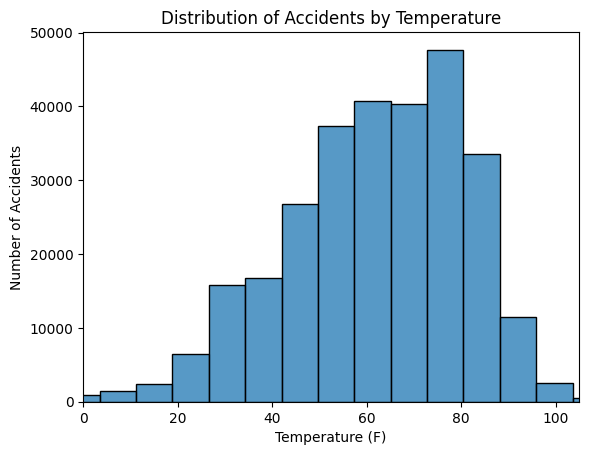

In [55]:
sns.histplot(data=accidents_data, x='Temperature(F)', bins=30, kde=False)
plt.title('Distribution of Accidents by Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Number of Accidents')
plt.xlim([0, 105])  # Set the x-axis boundaries

(-35.0, 105.0)

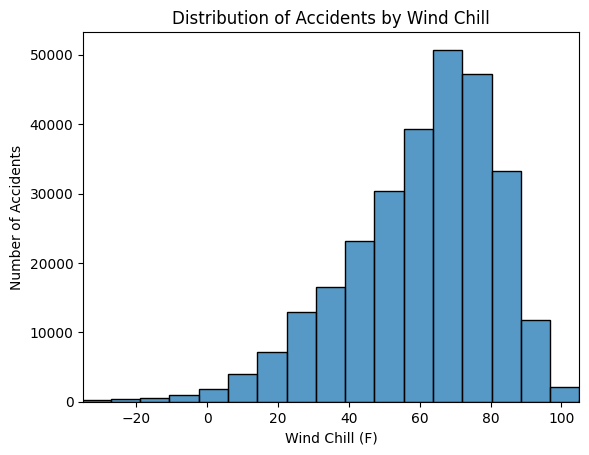

In [57]:
sns.histplot(data=accidents_data, x='Wind_Chill(F)', bins=30, kde=False)
plt.title('Distribution of Accidents by Wind Chill')
plt.xlabel('Wind Chill (F)')
plt.ylabel('Number of Accidents')
plt.xlim([-35, 105])  # Set the x-axis boundaries

Text(0, 0.5, 'Number of Accidents')

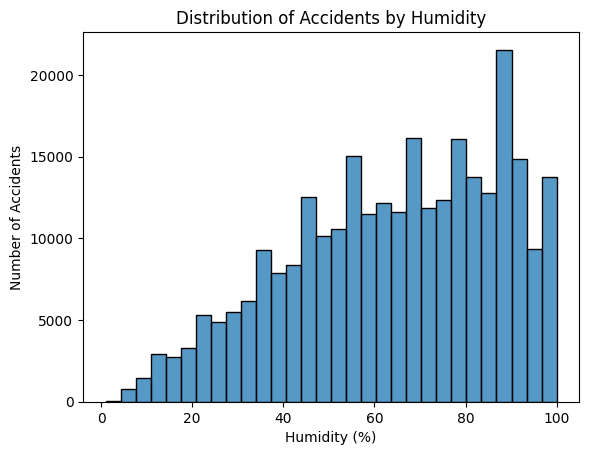

In [58]:
sns.histplot(data=accidents_data, x='Humidity(%)', bins=30, kde=False)
plt.title('Distribution of Accidents by Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Number of Accidents')